In [1]:
import rasterio
from pathlib import Path
import numpy as np

In [2]:
# change this depending on S3 implementation?
DATA_PATH =Path("local_data")
print(DATA_PATH.exists())


True


In [3]:

from smi import calc_smi_from_lst, get_list_of_lst_tiffs, main

# main()


In [4]:
lst_tiff_files = get_list_of_lst_tiffs()
lst_tiff_files

[PosixPath('/home/hbar6/projects/MIDS/210/AgriSense-210-Capstone/addtl_data_pipelines/local_data/LC09_L2SP_043035_20240618_20240619_02_T1_ST_B10.tif')]

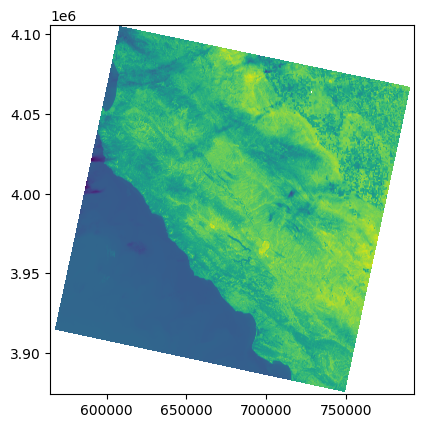

<Axes: >

In [5]:
from rasterio.plot import show
tiff_data = rasterio.open(lst_tiff_files[0])

show((tiff_data))

In [6]:
tiff_data

<open DatasetReader name='/home/hbar6/projects/MIDS/210/AgriSense-210-Capstone/addtl_data_pipelines/local_data/LC09_L2SP_043035_20240618_20240619_02_T1_ST_B10.tif' mode='r'>

In [7]:
# now show the SMI tif
SMI_tiff_path = Path("local_data/LC09_L2SP_043035_20240618_20240619_02_T1_SMI.tif")
SMI_tiff_path.exists()

True

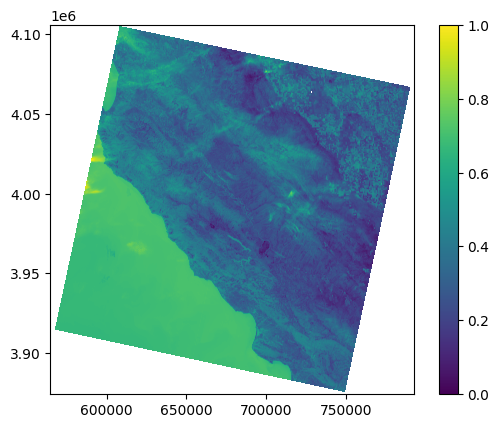

In [16]:
import matplotlib.pyplot as plt

smi_rast_data = rasterio.open(SMI_tiff_path)

fig, ax = plt.subplots(1,1)
retted = show(smi_rast_data, ax=ax)
im = retted.get_images()[0]
fig.colorbar(im, ax=ax)

In [17]:
smi_data = smi_rast_data.read(1)
smi_data[smi_data.shape[0]//2, smi_data.shape[1]//2]


np.float64(0.3093194213896138)

In [10]:
smi_data.min()

np.float64(-99999.0)

In [18]:
smi_data.max()

np.float64(1.0)

In [11]:
smi_data.dtype

dtype('float64')

In [12]:
smi_rast_data.nodata

-99999.0

In [13]:
smi_rast_data.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': -99999.0,
 'width': 7601,
 'height': 7721,
 'count': 1,
 'crs': CRS.from_epsg(32610),
 'transform': Affine(30.0, 0.0, 564885.0,
        0.0, -30.0, 4105815.0)}

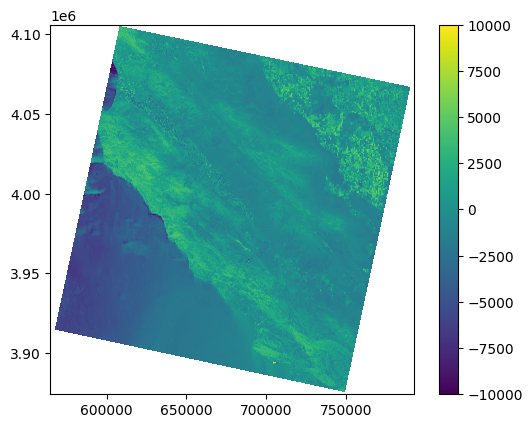

In [19]:


# NDMI is the moisture in vegetation. Dont think that's the same as soil moisture?
ndmi_tiff_path = Path("local_data/LC09_L2SP_043035_20240618_20240619_02_T1_SR_NDMI.tif")
ndmi_tiff_path.exists()

ndmi_rast_data = rasterio.open(ndmi_tiff_path)

fig, ax = plt.subplots(1,1)
retted = show(ndmi_rast_data, ax=ax)
im = retted.get_images()[0]
fig.colorbar(im, ax=ax)